<a href="https://colab.research.google.com/github/sudiksha2004/GDSC_MACHINE_LEARNING_-Sudiksha-Roy-Kanungoe-./blob/main/MNIST_Digit_Classify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images Test data = 10,000 images Image dimension ---> 28 x 28 Grayscale Image ---> 1 channel

In [5]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


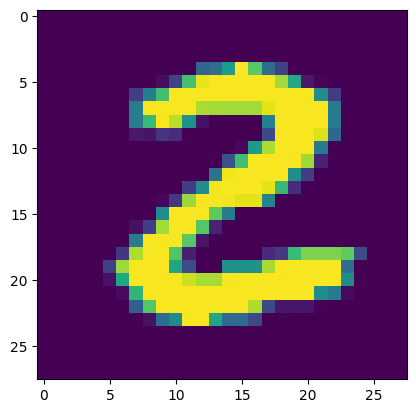

2


In [7]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(Y_train[25])

Image Labels

In [8]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one hot encoding

All the images have same dimension in the dataset , if not we have to resize all the images tocommon dimension

In [9]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

Building the neural network

In [10]:
#setting up layers of neural network
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ]
)

In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#training the neural network
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2889 - accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1330 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0438 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

Training data accuracy = 98.9%



**Accuracy on Test Data**

In [13]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9696
0.9696000218391418


Test data accuracy = 96.9%

In [15]:
print(X_test.shape)

(10000, 28, 28)


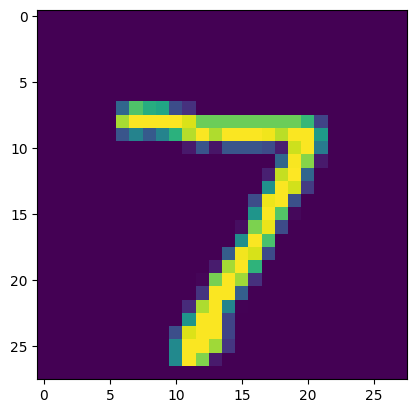

In [16]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

model.predict() gives the prediction probability of each class for that data point

In [20]:
#converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [21]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test ---> True Labels Y_pred_labels ---> Predicted Labels

Confusion Matrix

In [22]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [23]:
print(conf_mat)

tf.Tensor(
[[ 966    0    1    1    0    3    6    1    1    1]
 [   0 1121    1    1    0    2    2    0    8    0]
 [   5    2  996    4    2    1    1   11    9    1]
 [   1    0    3  952    0   44    0    3    3    4]
 [   1    0    0    0  965    2    5    2    0    7]
 [   3    0    0    5    1  877    3    0    1    2]
 [   3    2    1    1    6    5  940    0    0    0]
 [   1    2    9    2    2    1    0 1003    2    6]
 [   4    0    1    4   10   21    4    2  923    5]
 [   5    3    1    5   19   13    0    6    2  955]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

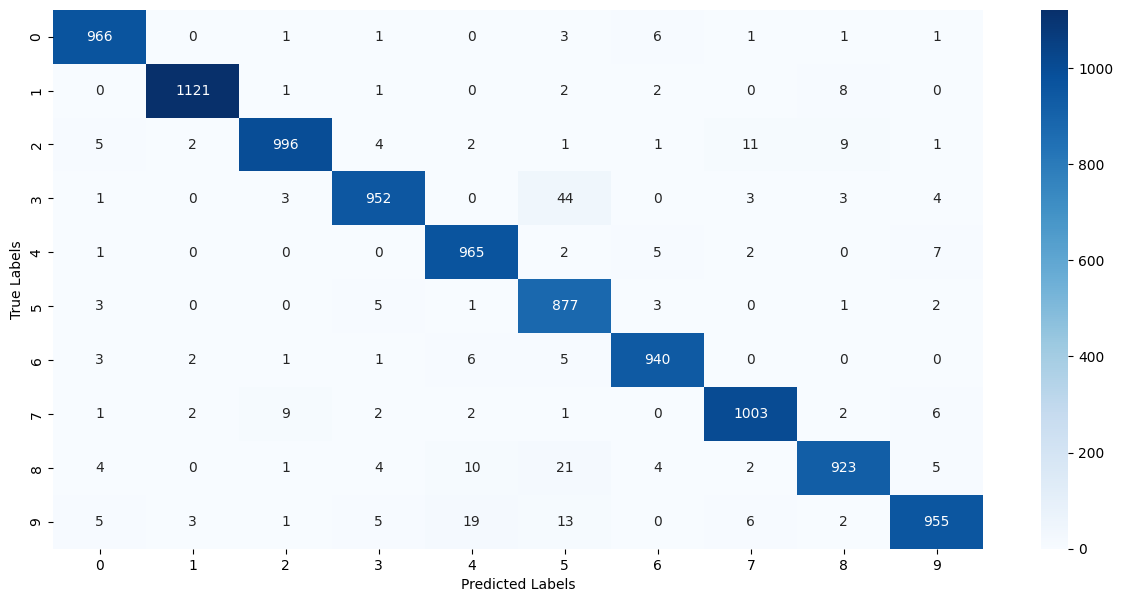

In [24]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Build a Predictive System



In [28]:
input_image_path ='/content/MNIST.png'
input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


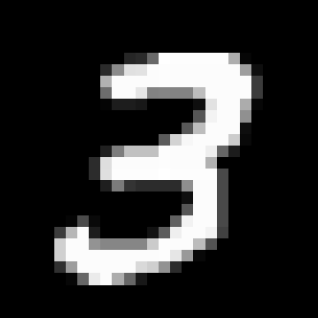

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 71ms/step
[[1.6888198e-09 4.6819578e-06 9.8636246e-01 1.0000000e+00 7.2889403e-12
  8.7847334e-01 2.3205074e-14 9.2180021e-04 9.9520350e-01 8.8840818e-01]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted/content/MNIST.png


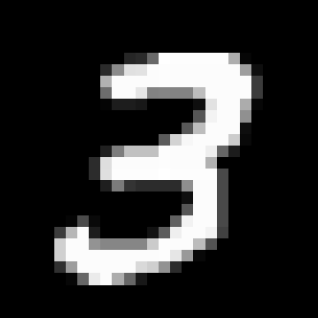

1/1 [==============================] - 0s 82ms/step
The Handwritten Digit is recognised as  3


In [44]:
input_image_path = input("Path of the image to be predicted")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)
